# Industry Driven Elective

## Artificial Intelligence and Machine Learning (IS6E106) offered by Nokia

### Project: Stock Price Prediction

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future.

In [96]:
# prerequisite installation
#!pip3 install yfinance
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install visualize

## Retrieving the data

[*********************100%***********************]  1 of 1 completed


/var/folders/0b/sr_7vrpd4h999j7kllww424c0000gn/T/ipykernel_2067/755208413.py:6: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



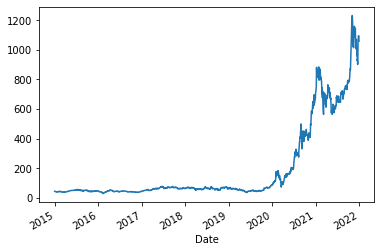

In [97]:
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
data = yf.download('TSLA','2015-01-01','2022-01-01')
data["Adj Close"].plot()
plt.show()

In [98]:
data.to_csv('tesla.csv',index = False)

## Normalising the data

In [99]:
import pandas as pd
import numpy as np

data = pd.read_csv('tesla.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))

        Open       High        Low      Close  Adj Close    Volume
0  44.618000  45.136002  44.450001  44.481998  44.481998  11487500
1  44.574001  44.650002  42.652000  43.862000  43.862000  23822000
2  42.910000  43.299999  41.431999  42.018002  42.018002  26842500
3  42.012001  42.840000  40.841999  42.256001  42.256001  31309500
4  42.669998  42.956001  41.956001  42.189999  42.189999  14842000


Open   --- mean : 191.2357847771677   	 Std:  268.57589583959066   	 Max:  1234.4100341796875   	 Min:  28.464000701904297
High   --- mean : 195.3130371651682   	 Std:  274.4522511077426   	 Max:  1243.489990234375   	 Min:  30.99399948120117
Low    --- mean : 186.9265443083921   	 Std:  262.2841396234461   	 Max:  1217.0   	 Min:  28.209999084472656
Close  --- mean : 191.40155297558323   	 Std:  268.83513567701107   	 Max:  1229.9100341796875   	 Min:  28.733999252319336
Volume --- mean : 38275839.51247165   	 Std:  28152650.760726396   	 Max:  304694000   	 Min:  3540000


In [100]:
data1=data

In [101]:
data.pop('High')
#Print the dataframe head and tail
print(data.head())
print("---")
print(data.tail())

        Open        Low      Close  Adj Close    Volume
0  44.618000  44.450001  44.481998  44.481998  11487500
1  44.574001  42.652000  43.862000  43.862000  23822000
2  42.910000  41.431999  42.018002  42.018002  26842500
3  42.012001  40.841999  42.256001  42.256001  31309500
4  42.669998  41.956001  42.189999  42.189999  14842000
---
             Open          Low        Close    Adj Close    Volume
1759  1073.670044  1070.719971  1093.939941  1093.939941  23715300
1760  1109.489990  1078.420044  1088.469971  1088.469971  20108000
1761  1098.640015  1064.140015  1086.189941  1086.189941  18718000
1762  1061.329956  1053.150024  1070.339966  1070.339966  15680300
1763  1073.439941  1054.589966  1056.780029  1056.780029  13577900


In [102]:
data.pop('Low')
#Print the dataframe head and tail
print(data.head())
print("---")
print(data.tail())

        Open      Close  Adj Close    Volume
0  44.618000  44.481998  44.481998  11487500
1  44.574001  43.862000  43.862000  23822000
2  42.910000  42.018002  42.018002  26842500
3  42.012001  42.256001  42.256001  31309500
4  42.669998  42.189999  42.189999  14842000
---
             Open        Close    Adj Close    Volume
1759  1073.670044  1093.939941  1093.939941  23715300
1760  1109.489990  1088.469971  1088.469971  20108000
1761  1098.640015  1086.189941  1086.189941  18718000
1762  1061.329956  1070.339966  1070.339966  15680300
1763  1073.439941  1056.780029  1056.780029  13577900


In [103]:
data.pop('Adj Close')
#Print the dataframe head and tail
print(data.head())
print("---")
print(data.tail())

        Open      Close    Volume
0  44.618000  44.481998  11487500
1  44.574001  43.862000  23822000
2  42.910000  42.018002  26842500
3  42.012001  42.256001  31309500
4  42.669998  42.189999  14842000
---
             Open        Close    Volume
1759  1073.670044  1093.939941  23715300
1760  1109.489990  1088.469971  20108000
1761  1098.640015  1086.189941  18718000
1762  1061.329956  1070.339966  15680300
1763  1073.439941  1056.780029  13577900


<AxesSubplot:>

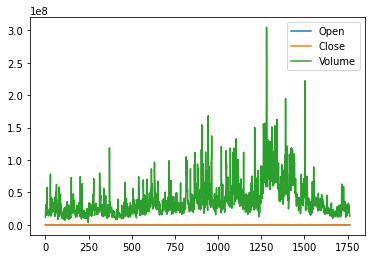

In [104]:
import matplotlib.pyplot as plt
data.plot()

# Normalize the data retrieved

In [105]:
from sklearn import preprocessing
preprocessing.normalize(data)
print(data.head())
print("\n")
print("Open   --- mean :", np.mean(data['Open']),  " \t Std: ", np.std(data['Open']),  "  Max: ", np.max(data['Open']),  " \t Min: ", np.min(data['Open']))
print("Close  --- mean :", np.mean(data['Close']), " \t Std: ", np.std(data['Close']), "  Max: ", np.max(data['Close']), " \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume'])," \t Std: ", np.std(data['Volume']),"  Max: ", np.max(data['Volume'])," \t Min: ", np.min(data['Volume']))

        Open      Close    Volume
0  44.618000  44.481998  11487500
1  44.574001  43.862000  23822000
2  42.910000  42.018002  26842500
3  42.012001  42.256001  31309500
4  42.669998  42.189999  14842000


Open   --- mean : 191.2357847771677  	 Std:  268.57589583959066   Max:  1234.4100341796875  	 Min:  28.464000701904297
Close  --- mean : 191.40155297558323  	 Std:  268.83513567701107   Max:  1229.9100341796875  	 Min:  28.733999252319336
Volume --- mean : 38275839.51247165  	 Std:  28152650.760726396   Max:  304694000  	 Min:  3540000


In [106]:
#Log the normalised data for future resuablilty
data.to_csv('tesla_preprocessed.csv',index= False)

# #Checkpoint 2:Benchmark Model

In [107]:

import math
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
import visualize as vs


data = pd.read_csv('tesla_preprocessed.csv')
display(data.head())

,Open,Close,Volume
0,44.618000,44.481998,11487500
1,44.574001,43.862000,23822000
2,42.910000,42.018002,26842500
3,42.012001,42.256001,31309500
4,42.669998,42.189999,14842000


In [108]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data,data, test_size=0.33)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1181, 3)
y_train (1181, 3)
x_test (583, 3)
y_test (583, 3)


In [109]:
import numpy as np
#building regression model
from sklearn.model_selection import train_test_split
#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

X=np.array(data.index).reshape(-1,1)
Y=data['Close']


X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.3,random_state=101)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)



#feature scaling
scaler=StandardScaler().fit(X_train)


from sklearn.linear_model import LinearRegression
#creating linear model
lm=LinearRegression()
lm.fit(X_train,y_train)



x_train (1234, 1)
y_train (1234,)
x_test (530, 1)
y_test (530,)


LinearRegression()

In [110]:
#plot actual and predicted values for train dataset
from plotly.graph_objects import layout
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

trace0= go.Scatter(
      x=X_train.T[0],
      y=y_train,
      mode='markers',
      name='Actual'
)

trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',name='Predicted'

)

tesla_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data,layout=layout)

iplot(plot2)

ValueError: 
    Invalid value of type 'builtins.module' received for the 'layout' property of 
        Received value: <module 'plotly.graph_objs.layout' from '/opt/homebrew/lib/python3.9/site-packages/plotly/graph_objs/layout/__init__.py'>

    The 'layout' property is an instance of Layout
    that may be specified as:
      - An instance of :class:`plotly.graph_objs.Layout`
      - A dict of string/value properties that will be passed
        to the Layout constructor

        Supported dict properties:
            
            activeshape
                :class:`plotly.graph_objects.layout.Activeshape
                ` instance or dict with compatible properties
            annotations
                A tuple of
                :class:`plotly.graph_objects.layout.Annotation`
                instances or dicts with compatible properties
            annotationdefaults
                When used in a template (as
                layout.template.layout.annotationdefaults),
                sets the default property values to use for
                elements of layout.annotations
            autosize
                Determines whether or not a layout width or
                height that has been left undefined by the user
                is initialized on each relayout. Note that,
                regardless of this attribute, an undefined
                layout width or height is always initialized on
                the first call to plot.
            autotypenumbers
                Using "strict" a numeric string in trace data
                is not converted to a number. Using *convert
                types* a numeric string in trace data may be
                treated as a number during automatic axis
                `type` detection. This is the default value;
                however it could be overridden for individual
                axes.
            bargap
                Sets the gap (in plot fraction) between bars of
                adjacent location coordinates.
            bargroupgap
                Sets the gap (in plot fraction) between bars of
                the same location coordinate.
            barmode
                Determines how bars at the same location
                coordinate are displayed on the graph. With
                "stack", the bars are stacked on top of one
                another With "relative", the bars are stacked
                on top of one another, with negative values
                below the axis, positive values above With
                "group", the bars are plotted next to one
                another centered around the shared location.
                With "overlay", the bars are plotted over one
                another, you might need to an "opacity" to see
                multiple bars.
            barnorm
                Sets the normalization for bar traces on the
                graph. With "fraction", the value of each bar
                is divided by the sum of all values at that
                location coordinate. "percent" is the same but
                multiplied by 100 to show percentages.
            boxgap
                Sets the gap (in plot fraction) between boxes
                of adjacent location coordinates. Has no effect
                on traces that have "width" set.
            boxgroupgap
                Sets the gap (in plot fraction) between boxes
                of the same location coordinate. Has no effect
                on traces that have "width" set.
            boxmode
                Determines how boxes at the same location
                coordinate are displayed on the graph. If
                "group", the boxes are plotted next to one
                another centered around the shared location. If
                "overlay", the boxes are plotted over one
                another, you might need to set "opacity" to see
                them multiple boxes. Has no effect on traces
                that have "width" set.
            calendar
                Sets the default calendar system to use for
                interpreting and displaying dates throughout
                the plot.
            clickmode
                Determines the mode of single click
                interactions. "event" is the default value and
                emits the `plotly_click` event. In addition
                this mode emits the `plotly_selected` event in
                drag modes "lasso" and "select", but with no
                event data attached (kept for compatibility
                reasons). The "select" flag enables selecting
                single data points via click. This mode also
                supports persistent selections, meaning that
                pressing Shift while clicking, adds to /
                subtracts from an existing selection. "select"
                with `hovermode`: "x" can be confusing,
                consider explicitly setting `hovermode`:
                "closest" when using this feature. Selection
                events are sent accordingly as long as "event"
                flag is set as well. When the "event" flag is
                missing, `plotly_click` and `plotly_selected`
                events are not fired.
            coloraxis
                :class:`plotly.graph_objects.layout.Coloraxis`
                instance or dict with compatible properties
            colorscale
                :class:`plotly.graph_objects.layout.Colorscale`
                instance or dict with compatible properties
            colorway
                Sets the default trace colors.
            computed
                Placeholder for exporting automargin-impacting
                values namely `margin.t`, `margin.b`,
                `margin.l` and `margin.r` in "full-json" mode.
            datarevision
                If provided, a changed value tells
                `Plotly.react` that one or more data arrays has
                changed. This way you can modify arrays in-
                place rather than making a complete new copy
                for an incremental change. If NOT provided,
                `Plotly.react` assumes that data arrays are
                being treated as immutable, thus any data array
                with a different identity from its predecessor
                contains new data.
            dragmode
                Determines the mode of drag interactions.
                "select" and "lasso" apply only to scatter
                traces with markers or text. "orbit" and
                "turntable" apply only to 3D scenes.
            editrevision
                Controls persistence of user-driven changes in
                `editable: true` configuration, other than
                trace names and axis titles. Defaults to
                `layout.uirevision`.
            extendfunnelareacolors
                If `true`, the funnelarea slice colors (whether
                given by `funnelareacolorway` or inherited from
                `colorway`) will be extended to three times its
                original length by first repeating every color
                20% lighter then each color 20% darker. This is
                intended to reduce the likelihood of reusing
                the same color when you have many slices, but
                you can set `false` to disable. Colors provided
                in the trace, using `marker.colors`, are never
                extended.
            extendiciclecolors
                If `true`, the icicle slice colors (whether
                given by `iciclecolorway` or inherited from
                `colorway`) will be extended to three times its
                original length by first repeating every color
                20% lighter then each color 20% darker. This is
                intended to reduce the likelihood of reusing
                the same color when you have many slices, but
                you can set `false` to disable. Colors provided
                in the trace, using `marker.colors`, are never
                extended.
            extendpiecolors
                If `true`, the pie slice colors (whether given
                by `piecolorway` or inherited from `colorway`)
                will be extended to three times its original
                length by first repeating every color 20%
                lighter then each color 20% darker. This is
                intended to reduce the likelihood of reusing
                the same color when you have many slices, but
                you can set `false` to disable. Colors provided
                in the trace, using `marker.colors`, are never
                extended.
            extendsunburstcolors
                If `true`, the sunburst slice colors (whether
                given by `sunburstcolorway` or inherited from
                `colorway`) will be extended to three times its
                original length by first repeating every color
                20% lighter then each color 20% darker. This is
                intended to reduce the likelihood of reusing
                the same color when you have many slices, but
                you can set `false` to disable. Colors provided
                in the trace, using `marker.colors`, are never
                extended.
            extendtreemapcolors
                If `true`, the treemap slice colors (whether
                given by `treemapcolorway` or inherited from
                `colorway`) will be extended to three times its
                original length by first repeating every color
                20% lighter then each color 20% darker. This is
                intended to reduce the likelihood of reusing
                the same color when you have many slices, but
                you can set `false` to disable. Colors provided
                in the trace, using `marker.colors`, are never
                extended.
            font
                Sets the global font. Note that fonts used in
                traces and other layout components inherit from
                the global font.
            funnelareacolorway
                Sets the default funnelarea slice colors.
                Defaults to the main `colorway` used for trace
                colors. If you specify a new list here it can
                still be extended with lighter and darker
                colors, see `extendfunnelareacolors`.
            funnelgap
                Sets the gap (in plot fraction) between bars of
                adjacent location coordinates.
            funnelgroupgap
                Sets the gap (in plot fraction) between bars of
                the same location coordinate.
            funnelmode
                Determines how bars at the same location
                coordinate are displayed on the graph. With
                "stack", the bars are stacked on top of one
                another With "group", the bars are plotted next
                to one another centered around the shared
                location. With "overlay", the bars are plotted
                over one another, you might need to an
                "opacity" to see multiple bars.
            geo
                :class:`plotly.graph_objects.layout.Geo`
                instance or dict with compatible properties
            grid
                :class:`plotly.graph_objects.layout.Grid`
                instance or dict with compatible properties
            height
                Sets the plot's height (in px).
            hiddenlabels
                hiddenlabels is the funnelarea & pie chart
                analog of visible:'legendonly' but it can
                contain many labels, and can simultaneously
                hide slices from several pies/funnelarea charts
            hiddenlabelssrc
                Sets the source reference on Chart Studio Cloud
                for `hiddenlabels`.
            hidesources
                Determines whether or not a text link citing
                the data source is placed at the bottom-right
                cored of the figure. Has only an effect only on
                graphs that have been generated via forked
                graphs from the Chart Studio Cloud (at
                https://chart-studio.plotly.com or on-premise).
            hoverdistance
                Sets the default distance (in pixels) to look
                for data to add hover labels (-1 means no
                cutoff, 0 means no looking for data). This is
                only a real distance for hovering on point-like
                objects, like scatter points. For area-like
                objects (bars, scatter fills, etc) hovering is
                on inside the area and off outside, but these
                objects will not supersede hover on point-like
                objects in case of conflict.
            hoverlabel
                :class:`plotly.graph_objects.layout.Hoverlabel`
                instance or dict with compatible properties
            hovermode
                Determines the mode of hover interactions. If
                "closest", a single hoverlabel will appear for
                the "closest" point within the `hoverdistance`.
                If "x" (or "y"), multiple hoverlabels will
                appear for multiple points at the "closest" x-
                (or y-) coordinate within the `hoverdistance`,
                with the caveat that no more than one
                hoverlabel will appear per trace. If *x
                unified* (or *y unified*), a single hoverlabel
                will appear multiple points at the closest x-
                (or y-) coordinate within the `hoverdistance`
                with the caveat that no more than one
                hoverlabel will appear per trace. In this mode,
                spikelines are enabled by default perpendicular
                to the specified axis. If false, hover
                interactions are disabled.
            iciclecolorway
                Sets the default icicle slice colors. Defaults
                to the main `colorway` used for trace colors.
                If you specify a new list here it can still be
                extended with lighter and darker colors, see
                `extendiciclecolors`.
            images
                A tuple of
                :class:`plotly.graph_objects.layout.Image`
                instances or dicts with compatible properties
            imagedefaults
                When used in a template (as
                layout.template.layout.imagedefaults), sets the
                default property values to use for elements of
                layout.images
            legend
                :class:`plotly.graph_objects.layout.Legend`
                instance or dict with compatible properties
            mapbox
                :class:`plotly.graph_objects.layout.Mapbox`
                instance or dict with compatible properties
            margin
                :class:`plotly.graph_objects.layout.Margin`
                instance or dict with compatible properties
            meta
                Assigns extra meta information that can be used
                in various `text` attributes. Attributes such
                as the graph, axis and colorbar `title.text`,
                annotation `text` `trace.name` in legend items,
                `rangeselector`, `updatemenus` and `sliders`
                `label` text all support `meta`. One can access
                `meta` fields using template strings:
                `%{meta[i]}` where `i` is the index of the
                `meta` item in question. `meta` can also be an
                object for example `{key: value}` which can be
                accessed %{meta[key]}.
            metasrc
                Sets the source reference on Chart Studio Cloud
                for `meta`.
            modebar
                :class:`plotly.graph_objects.layout.Modebar`
                instance or dict with compatible properties
            newshape
                :class:`plotly.graph_objects.layout.Newshape`
                instance or dict with compatible properties
            paper_bgcolor
                Sets the background color of the paper where
                the graph is drawn.
            piecolorway
                Sets the default pie slice colors. Defaults to
                the main `colorway` used for trace colors. If
                you specify a new list here it can still be
                extended with lighter and darker colors, see
                `extendpiecolors`.
            plot_bgcolor
                Sets the background color of the plotting area
                in-between x and y axes.
            polar
                :class:`plotly.graph_objects.layout.Polar`
                instance or dict with compatible properties
            scene
                :class:`plotly.graph_objects.layout.Scene`
                instance or dict with compatible properties
            selectdirection
                When `dragmode` is set to "select", this limits
                the selection of the drag to horizontal,
                vertical or diagonal. "h" only allows
                horizontal selection, "v" only vertical, "d"
                only diagonal and "any" sets no limit.
            selectionrevision
                Controls persistence of user-driven changes in
                selected points from all traces.
            separators
                Sets the decimal and thousand separators. For
                example, *. * puts a '.' before decimals and a
                space between thousands. In English locales,
                dflt is ".," but other locales may alter this
                default.
            shapes
                A tuple of
                :class:`plotly.graph_objects.layout.Shape`
                instances or dicts with compatible properties
            shapedefaults
                When used in a template (as
                layout.template.layout.shapedefaults), sets the
                default property values to use for elements of
                layout.shapes
            showlegend
                Determines whether or not a legend is drawn.
                Default is `true` if there is a trace to show
                and any of these: a) Two or more traces would
                by default be shown in the legend. b) One pie
                trace is shown in the legend. c) One trace is
                explicitly given with `showlegend: true`.
            sliders
                A tuple of
                :class:`plotly.graph_objects.layout.Slider`
                instances or dicts with compatible properties
            sliderdefaults
                When used in a template (as
                layout.template.layout.sliderdefaults), sets
                the default property values to use for elements
                of layout.sliders
            smith
                :class:`plotly.graph_objects.layout.Smith`
                instance or dict with compatible properties
            spikedistance
                Sets the default distance (in pixels) to look
                for data to draw spikelines to (-1 means no
                cutoff, 0 means no looking for data). As with
                hoverdistance, distance does not apply to area-
                like objects. In addition, some objects can be
                hovered on but will not generate spikelines,
                such as scatter fills.
            sunburstcolorway
                Sets the default sunburst slice colors.
                Defaults to the main `colorway` used for trace
                colors. If you specify a new list here it can
                still be extended with lighter and darker
                colors, see `extendsunburstcolors`.
            template
                Default attributes to be applied to the plot.
                This should be a dict with format: `{'layout':
                layoutTemplate, 'data': {trace_type:
                [traceTemplate, ...], ...}}` where
                `layoutTemplate` is a dict matching the
                structure of `figure.layout` and
                `traceTemplate` is a dict matching the
                structure of the trace with type `trace_type`
                (e.g. 'scatter'). Alternatively, this may be
                specified as an instance of
                plotly.graph_objs.layout.Template.  Trace
                templates are applied cyclically to traces of
                each type. Container arrays (eg `annotations`)
                have special handling: An object ending in
                `defaults` (eg `annotationdefaults`) is applied
                to each array item. But if an item has a
                `templateitemname` key we look in the template
                array for an item with matching `name` and
                apply that instead. If no matching `name` is
                found we mark the item invisible. Any named
                template item not referenced is appended to the
                end of the array, so this can be used to add a
                watermark annotation or a logo image, for
                example. To omit one of these items on the
                plot, make an item with matching
                `templateitemname` and `visible: false`.
            ternary
                :class:`plotly.graph_objects.layout.Ternary`
                instance or dict with compatible properties
            title
                :class:`plotly.graph_objects.layout.Title`
                instance or dict with compatible properties
            titlefont
                Deprecated: Please use layout.title.font
                instead. Sets the title font. Note that the
                title's font used to be customized by the now
                deprecated `titlefont` attribute.
            transition
                Sets transition options used during
                Plotly.react updates.
            treemapcolorway
                Sets the default treemap slice colors. Defaults
                to the main `colorway` used for trace colors.
                If you specify a new list here it can still be
                extended with lighter and darker colors, see
                `extendtreemapcolors`.
            uirevision
                Used to allow user interactions with the plot
                to persist after `Plotly.react` calls that are
                unaware of these interactions. If `uirevision`
                is omitted, or if it is given and it changed
                from the previous `Plotly.react` call, the
                exact new figure is used. If `uirevision` is
                truthy and did NOT change, any attribute that
                has been affected by user interactions and did
                not receive a different value in the new figure
                will keep the interaction value.
                `layout.uirevision` attribute serves as the
                default for `uirevision` attributes in various
                sub-containers. For finer control you can set
                these sub-attributes directly. For example, if
                your app separately controls the data on the x
                and y axes you might set
                `xaxis.uirevision=*time*` and
                `yaxis.uirevision=*cost*`. Then if only the y
                data is changed, you can update
                `yaxis.uirevision=*quantity*` and the y axis
                range will reset but the x axis range will
                retain any user-driven zoom.
            uniformtext
                :class:`plotly.graph_objects.layout.Uniformtext
                ` instance or dict with compatible properties
            updatemenus
                A tuple of
                :class:`plotly.graph_objects.layout.Updatemenu`
                instances or dicts with compatible properties
            updatemenudefaults
                When used in a template (as
                layout.template.layout.updatemenudefaults),
                sets the default property values to use for
                elements of layout.updatemenus
            violingap
                Sets the gap (in plot fraction) between violins
                of adjacent location coordinates. Has no effect
                on traces that have "width" set.
            violingroupgap
                Sets the gap (in plot fraction) between violins
                of the same location coordinate. Has no effect
                on traces that have "width" set.
            violinmode
                Determines how violins at the same location
                coordinate are displayed on the graph. If
                "group", the violins are plotted next to one
                another centered around the shared location. If
                "overlay", the violins are plotted over one
                another, you might need to set "opacity" to see
                them multiple violins. Has no effect on traces
                that have "width" set.
            waterfallgap
                Sets the gap (in plot fraction) between bars of
                adjacent location coordinates.
            waterfallgroupgap
                Sets the gap (in plot fraction) between bars of
                the same location coordinate.
            waterfallmode
                Determines how bars at the same location
                coordinate are displayed on the graph. With
                "group", the bars are plotted next to one
                another centered around the shared location.
                With "overlay", the bars are plotted over one
                another, you might need to an "opacity" to see
                multiple bars.
            width
                Sets the plot's width (in px).
            xaxis
                :class:`plotly.graph_objects.layout.XAxis`
                instance or dict with compatible properties
            yaxis
                :class:`plotly.graph_objects.layout.YAxis`
                instance or dict with compatible properties


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegressionModel.build_model(X_train,y_train)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(f"intercept: {regressor.intercept_}")
print(f"slope: {regressor.coef_}")

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(X_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions.all()), max(X_test))
p2 = min(min(predictions.all()), min(X_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

Mean Squared Error (MSE) is the mean of the squared errors.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# Checkpoint #3
Long-Sort Term Memory Model
In this section we will use LSTM to train and test on our data set.

Basic LSTM Model
First lets make a basic LSTM model.

Step 1 : import keras libraries for smooth implementaion of lstm

In [ ]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('tesla_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

In [ ]:
from keras import Sequential
from keras import Dense
from keras import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

In [ ]:

model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

In [ ]:
import tensorflow as tf

tf.__version__

In [ ]:
###Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
import numpy
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Trying a different approach with LSTM


In [ ]:
import pandas as pd

df=pd.read_csv('tesla.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np
df1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

In [ ]:
train_data

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

In [ ]:
print(X_test.shape), print(ytest.shape)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
###Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[518:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1664:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)

In [ ]:
import TableIt
print(lst_output)
TableIt.printTable(lst_output)
